# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Ilham Samsul Arifin]
- **Email:** [ilhamsamsularifin@gmail.com]
- **ID Dicoding:** [ilham_isa]

## Menentukan Pertanyaan Bisnis

- Berapa jumlah daftar rental disetiap bulannya?
- Berapa jumlah pengguna sepeda disetiap bulannya?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data

## Data Wrangling

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/ilhamarifinsamsul/final-project-analisis-data/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ilhamarifinsamsul/final-project-analisis-data/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Mengkonversi tipe data dteday

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
310,311,2011-11-07,4,0,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225,373,3662,4035
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
65,66,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,244,1628,1872
225,226,2011-08-14,3,0,8,0,0,0,2,0.676667,0.624388,0.817500,0.222633,1338,2482,3820
719,720,2012-12-20,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128


In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
day_df.dteday.is_unique

True

In [21]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15971,15972,2012-11-03,4,1,11,4,0,6,0,2,0.32,0.3030,0.49,0.2985,8,8,16
2746,2747,2011-04-29,2,0,4,8,0,5,1,1,0.54,0.5152,0.39,0.2985,35,386,421
17163,17164,2012-12-22,1,1,12,22,0,6,0,1,0.22,0.2121,0.51,0.2836,1,38,39
5073,5074,2011-08-04,3,0,8,7,0,4,1,2,0.68,0.6364,0.89,0.2985,11,271,282
14553,14554,2012-09-03,3,1,9,14,1,1,0,1,0.74,0.6970,0.70,0.2985,163,349,512


In [22]:
hour_df.dteday.is_unique

False

In [23]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
day_df.groupby(by="mnth").agg({
    "season": "nunique",
    "weathersit": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

season weathersit   cnt                                
     nunique    nunique   max   min         mean          std
mnth                                                         
1          1          3  4521   431  2176.338710  1161.674370
2          1          3  5062  1005  2655.298246  1145.313307
3          2          3  8362   605  3692.258065  1899.301812
4          1          3  7460   795  4484.900000  1776.160778
5          1          2  8294  2633  5349.774194  1298.711561
6          2          2  8120  3767  5772.366667  1240.400031
7          1          3  8173  3285  5563.677419  1273.751871
8          1          2  7865  1115  5664.419355  1494.516146
9          2          3  8714  1842  5766.516667  1810.130649
10         1          3  8156    22  5199.225806  1988.392517
11         1          3  6852  1495  4247.183333  1285.712709
12         2          3  6606   441  3403.806452  1549.639353

In [25]:
hour_df.groupby(by="mnth").agg({
    "season": "nunique",
    "weathersit": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

season weathersit  cnt                            
     nunique    nunique  max min        mean         std
mnth                                                    
1          1          4  559   1   94.424773   99.907146
2          1          3  610   1  112.865026  112.486565
3          2          3  957   1  155.410726  163.543050
4          1          3  822   1  187.260960  181.137902
5          1          3  873   1  222.907258  187.721497
6          2          3  900   1  240.515278  196.038950
7          1          3  913   1  231.819892  187.483806
8          1          3  941   1  238.097627  200.444648
9          2          3  977   1  240.773138  214.609531
10         1          3  963   1  222.158511  203.477057
11         1          3  729   1  177.335421  158.973887
12         2          3  759   1  142.303439  141.080674

# Explore All Data

## Menggabungkan day_df & hour_df

In [26]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
all_df.groupby(by="mnth_x").dteday.nunique().sort_values(ascending=False).head(10)

,dteday
mnth_x,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [28]:
all_df.groupby(by="season_y").dteday.nunique().sort_values(ascending=False)

,dteday
season_y,
3,188
2,184
1,181
4,178


In [29]:
all_df.groupby(by="season_x").dteday.nunique().sort_values(ascending=False)

,dteday
season_x,
3,188
2,184
1,181
4,178


In [30]:
all_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
13909,585,2012-08-07,3,1,8,0,2,1,2,0.735833,...,2,1,2,0.76,0.7121,0.62,0.1642,103,711,814
12935,545,2012-06-28,3,1,6,0,4,1,1,0.749167,...,4,1,1,0.62,0.6061,0.61,0.1045,0,11,11
14572,613,2012-09-04,3,1,9,0,2,1,1,0.725833,...,2,1,2,0.72,0.6970,0.79,0.2239,30,293,323
4517,193,2011-07-12,3,0,7,0,2,1,1,0.794167,...,2,1,2,0.70,0.6667,0.79,0.0000,2,6,8
7688,325,2011-11-21,4,0,11,0,1,1,3,0.447500,...,1,1,3,0.40,0.4091,0.87,0.1642,4,29,33


In [31]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Berapa jumlah daftar rental disetiap bulannya?

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='dteday').agg({
    "registered_y": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "registered_y": "daftar rental"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-30-fa7b50a043c0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='dteday').agg({


,dteday,daftar rental
0,2011-01,35116
1,2011-02,41973
2,2011-03,51219
3,2011-04,72524
4,2011-05,104771


<ipython-input-32-36e7089160ba>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='dteday').agg({


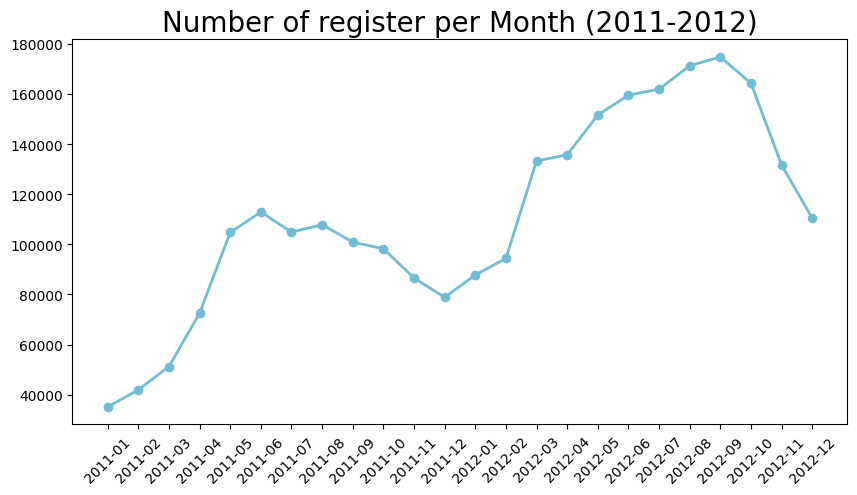

In [32]:
monthly_orders_df = all_df.resample(rule='M', on='dteday').agg({
    "registered_y": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "registered_y": "daftar rental"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["dteday"],
    monthly_orders_df["daftar rental"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of register per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:
Berapa jumlah pengguna sepeda disetiap bulannya?

In [ ]:
bymnth_df = all_df.resample(rule='M', on='dteday').agg({
    "mnth_x": "sum"
})
bymnth_df.index = bymnth_df.index.strftime('%Y-%m') #mengubah format order date menjadi Tahun-Bulan
bymnth_df = bymnth_df.reset_index()
bymnth_df.rename(columns={
    "mnth_x": "pengguna per bulan"
}, inplace=True)
bymnth_df.head()

<ipython-input-32-53d58b0baf64>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bymnth_df = all_df.resample(rule='M', on='dteday').agg({


,dteday,pengguna per bulan
0,2011-01,688
1,2011-02,1298
2,2011-03,2190
3,2011-04,2876
4,2011-05,3720


<ipython-input-33-e3af9ceadc7e>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bymnth_df = all_df.resample(rule='M', on='dteday').agg({


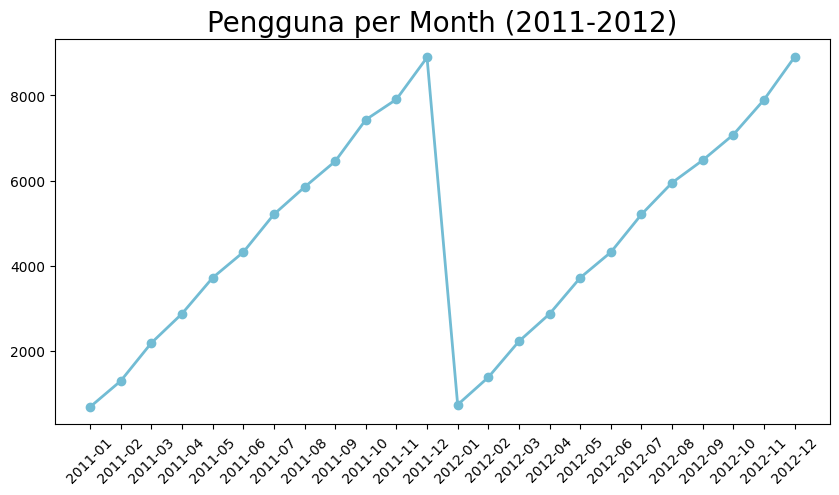

In [33]:
bymnth_df = all_df.resample(rule='M', on='dteday').agg({
    "mnth_x": "sum"
})
bymnth_df.index = bymnth_df.index.strftime('%Y-%m') #mengubah format order date menjadi Tahun-Bulan
bymnth_df = bymnth_df.reset_index()
bymnth_df.rename(columns={
    "mnth_x": "pengguna per bulan"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(
    bymnth_df["dteday"],
    bymnth_df["pengguna per bulan"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Pengguna per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Jumlah registrasi dari bulan 01-2011 mengalami kenaikan sampai bulan 05-2011 dan menurun pada bulan 06-2011 sampai 12-2011 dan mengalami kenaikan sangat pesat pada tahun 01-2012 sampai 09-2012
- Conclution pertanyaan 2 : Jumlah pengguna setiap bulannya mengalami kenaikan